# **Trottinettes en libre service**
## MDI230 - Files d'attente 
## Fait par : **Samia Abrik**

In [29]:
import graphviz as gv
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set(palette="colorblind", style="darkgrid")

## **Question 1**

On a le système suivant :
- **N** trottinettes
- Taux d’emprunt moyen : **$\lambda$** trottinettes par minute
- Temps moyen d’un trajet par un utilisateur : **$t_{trajet}$**
- Probabilité de tomber en panne : **$p_{panne}$**
- Probabilité d'avoir une batterie vide : **$p_{vide}$**
- Une trottinette non utilisée ne peut pas tomber en panne ou avoir une batterie vide
- Temps moyen d’intervention d’un prestataire ou d’un technicien : **$t_{intervention}$**
- Temps moyen de recharge de la batterie : **$t_{recharge}$**
- Temps moyen de réparation pour une trottinette : **$t_{réparation}$**
- Iil y a suffisamment de prestataires et de techniciens pour chercher, charger et réparer les trottinettes qui en ont besoin simultanément.

Définissons d'abord les valeurs numériques des paramétres du système :


In [30]:
N = 100
lambda_val = 0.1
t_trajet = 5
p_panne = 0.01
p_vide = 0.1
t_int = 30
t_recharge = 240
t_reparation = 720

**Modélisation du système :**

On considère que les trottinettes peuvent appartenir à 4 classes ou "colonies" possibles :
1) Disponible : Trottinettes qui sont actuellement disponibles pour être empruntées par les utilisateurs. Elles sont opérationnelles et prêtes à être utilisées.
2) Utilisée : Trottinettes qui sont actuellement utilisées par des utilisateurs pour leurs trajets. Elles sont en mouvement et sont en cours d'utilisation.
3) En panne : Trottinettes qui ont rencontré un dysfonctionnement nécessitant une réparation. Elles ne sont pas utilisables tant qu'elles ne sont pas réparées par un technicien.
4) Batterie vide : Trottinettes dont la batterie est déchargée et nécessite d'être rechargée. Elles ne sont pas utilisables tant qu'elles n'ont pas été récupérées et rechargées par un prestataire.

Le processus de Markov permettant de modéliser le système est donc le processus de migration fermée d'espace d'états :
$$
\mathbf{E} = \{ (n_1,n_2,n_3,n_4) \in \mathbb{N}^4 / \sum_{i=1}^{4}n_i=N \}
$$

Le diagramme de transition suivant permet de résumer les transitions possibles entre colonies :

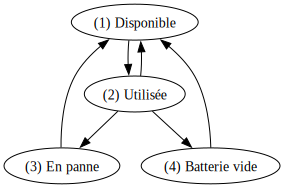

In [31]:
# Création du graph
G = gv.Digraph()

# Ajout des noeuds
etats = ["(1) Disponible", "(2) Utilisée", "(3) En panne", "(4) Batterie vide"]
for etat in etats:
    G.node(etat)

# Ajout des transitions entre les états
transitions = [("(1) Disponible", "(2) Utilisée"),
               ("(2) Utilisée","(1) Disponible"),
               ("(2) Utilisée", "(3) En panne"),
               ("(2) Utilisée", "(4) Batterie vide"),
               ("(3) En panne", "(1) Disponible"),
               ("(4) Batterie vide", "(1) Disponible")]
for transition in transitions:
    G.edge(transition[0], transition[1])

G


**Transitions possibles :**
- 1 $\longrightarrow$ 2 et 2 $\longrightarrow$ 1
- 2 $\longrightarrow$ 3 et 2 $\longrightarrow$ 4
- 3 $\longrightarrow$ 1 et 4 $\longrightarrow$ 1

**Taux de transitions à definir :**
\begin{align*}
q(n, T_{1,2}(n)) &= \Phi_1(n_1) \lambda_{1,2} \\
q(n, T_{2,1}(n)) &= \Phi_2(n_2) \lambda_{2,1} \\
q(n, T_{2,3}(n)) &= \Phi_2(n_2) \lambda_{2,3} \\
q(n, T_{2,4}(n)) &= \Phi_2(n_2) \lambda_{2,4} \\
q(n, T_{3,1}(n)) &= \Phi_3(n_3) \lambda_{3,1} \\
q(n, T_{4,1}(n)) &= \Phi_4(n_4) \lambda_{4,1} \\
\end{align*}

## **Question 2**

- Transition 1 $\longrightarrow$ 2 : Cette transition se produit lorsque des utilisateurs empruntent des trottinettes disponibles pour leurs trajets. Elle dépend du faite s'il y a des trottinettes à emprunter ou pas ($n_1>0$) et du taux d'emprunt moyen ($\lambda$).
$$ q(n, T_{1,2}(n)) = \Phi_1(n_1) \lambda_{1,2} = \mathbf{1}_{(n_1 > 0)} \lambda $$

- Transition 2 $\longrightarrow$ 1 : Lorsque les utilisateurs terminent leurs trajets, les trottinettes deviennent disponibles à nouveau. Cette transition dépend du nombre de trottinettes utilisées ($n_2$), du temps moyen de trajet par utilisateur, ainsi que la probabilité de ne pas teomber en panne ni d'avoir une batterie vide.
$$ q(n, T_{2,1}(n)) = \Phi_2(n_2) \lambda_{2,1} = n_2 \frac 1 {t_{trajet}} (1-(p_{panne}+p_{vide})) $$

- Transition 2 $\longrightarrow$ 3 : Si une trottinette en cours d'utilisation tombe en panne pendant le trajet, elle passe dans l'état "En panne". La probabilité de cette transition dépend du nombre de trottinettes utilisées ($n_2$) et de la probabilité de panne.
$$ q(n, T_{2,3}(n)) = \Phi_2(n_2) \lambda_{2,3} = n_2 \frac 1 {t_{trajet}} p_{panne} $$

- Transition 2 $\longrightarrow$ 4 : Si la batterie d'une trottinette en cours d'utilisation se vide pendant le trajet, elle devient "Batterie vide". Cette transition dépend du nombre de trottinettes utilisées ($n_2$) et de la probabilité de batterie vide.
$$ q(n, T_{2,4}(n)) = \Phi_2(n_2) \lambda_{2,4} = n_2 \frac 1 {t_{trajet}} p_{vide} $$

- Transition 3 $\longrightarrow$ 1 : Une fois réparées, les trottinettes en panne redeviennent disponibles pour les utilisateurs. Cette transition dépend du nombre de trottinettes en panne ($n_3$) et du temps moyen d'intervention et de réparation.
$$ q(n, T_{3,1}(n)) = \Phi_3(n_3) \lambda_{3,1} = n_3 \frac 1 {t_{intervention}+t_{réparation}} $$

- Transition 4 $\longrightarrow$ 1 : Une fois que les trottinettes avec batterie vide ont été rechargées, elles redeviennent disponibles pour les utilisateurs. Cette transition dépend du nombre de trottinettes avec batterie vide ($n_4$) et du temps moyen d'intervention et de recharge.
$$ q(n, T_{4,1}(n)) = \Phi_4(n_4) \lambda_{4,1} = n_4 \frac 1 {t_{intervention}+t_{recharge}} $$

Finallement,

**Taux de transitions :**
\begin{align*}
q(n, T_{1,2}(n)) &= \Phi_1(n_1) \lambda_{1,2} = \mathbf{1}_{(n_1 > 0)} \lambda\\
q(n, T_{2,1}(n)) &= \Phi_2(n_2) \lambda_{2,1} = n_2 \frac 1 {t_{trajet}} (1-(p_{panne}+p_{vide}))\\
q(n, T_{2,3}(n)) &= \Phi_2(n_2) \lambda_{2,3} = n_2 \frac 1 {t_{trajet}} p_{panne} \\
q(n, T_{2,4}(n)) &= \Phi_2(n_2) \lambda_{2,4} = n_2 \frac 1 {t_{trajet}} p_{vide}\\
q(n, T_{3,1}(n)) &= \Phi_3(n_3) \lambda_{3,1} = n_3 \frac 1 {t_{intervention}+t_{réparation}}\\
q(n, T_{4,1}(n)) &= \Phi_4(n_4) \lambda_{4,1} = n_4 \frac 1 {t_{intervention}+t_{recharge}}\\
\end{align*}


In [32]:
# Définition des valeurs pour lambda_ij
lambda_12 = lambda_val  
lambda_21 = (1 / t_trajet) * (1 - (p_panne + p_vide))  
lambda_23 = (1 / t_trajet) * p_panne  
lambda_24 = (1 / t_trajet) * p_vide  
lambda_31 = (1 / (t_int + t_reparation))  
lambda_41 = (1 / (t_int + t_recharge)) 

# Définition de phi_i
phi_1 = lambda n: 1 if n > 0 else 0  
phi_2 = lambda n: n  
phi_3 = lambda n: n  
phi_4 = lambda n: n  

## **Question 3** 

Selon le théorème vu en cours, la probabilité stationnaire théorique du modèle est de la forme :
$$ \forall n \in \mathbf{E}: \pi(n)= \frac 1 K \prod_{j=1}^{4} \frac{\alpha_j^{n_j}}{\prod_{n=1}^{n_j}\Phi_j(n)} $$
avec $K$ une constante de normalisation et les $\alpha_j$ des constantes strictement positives vérifiant l'équation de trafic :
$$ \forall j \in \{1,2,3,4\} : \alpha_j \sum_{k=1,k\neq j}^{4} \lambda_{j,k} = \sum_{k=1,k\neq j}^{4} \alpha_k \lambda_{k,j} $$
En remplacent les $\lambda$ et les $\Phi$ par leurs expressions d'après la question (2), on obtient:
$$ \forall n \in \mathbf{E}: \pi(n)= \frac 1 K \alpha_1^{n_1}\frac{\alpha_2^{n_2}}{n_2!}\frac{\alpha_3^{n_3}}{n_3!}\frac{\alpha_4^{n_4}}{n_4!} $$
En développant l'equation du trafic, on trouve que les $\alpha_j$ vérifie le système linéaire suivant :
\begin{align*}
\lambda_{12}\alpha_1 - \lambda_{21}\alpha_2-\lambda_{31}\alpha_3-\lambda_{41}\alpha_4 &= 0 \\
-\lambda_{12}\alpha_1 + (\lambda_{21}+\lambda_{23}+\lambda_{24})\alpha_2 &= 0 \\
-\lambda_{23}\alpha_2 + \lambda_{31}\alpha_3 &= 0 \\
-\lambda_{24}\alpha_2 + \lambda_{41}\alpha_4 &= 0 \\
\end{align*}
Ce qui est équivalent à écrire :
$$ 
\Lambda
\begin{pmatrix}
\alpha_1 \\
\alpha_2 \\
\alpha_3 \\
\alpha_4 \\
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0 \\
0 \\
0 \\
\end{pmatrix}
$$
avec 
$$
\Lambda =
\begin{pmatrix}
\lambda_{12} & -\lambda_{21} & -\lambda_{31} & -\lambda_{41} \\
-\lambda_{12} & \lambda_{21}+\lambda_{23}+\lambda_{24} & 0 & 0 \\
0 & -\lambda_{23} & \lambda_{31} & 0 \\
0 & -\lambda_{24} & 0 & \lambda_{41} \\
\end{pmatrix}
$$

Les paramètres $\alpha$ sont définits à une constante prét, donc pour avoir une unique solution, on rajoute la contrainte suivante :
$$ \alpha_1 + \alpha_2 + \alpha_3 + \alpha_4 = 1 $$

In [33]:
# Définition de la matrice Lambda
Lambda_matrix = np.array([[lambda_12, -lambda_21, -lambda_31 , -lambda_41],
                          [-lambda_12, lambda_21 + lambda_23 + lambda_24, 0 , 0],
                          [0, -lambda_23, lambda_31,0],
                          [0, -lambda_24, 0, lambda_41]])

# Ajout de la contrainte la somme des alphas = 1
Lambda_matrix = np.vstack([Lambda_matrix, [1, 1, 1, 1]])
b = np.array([0,0,0,0,1])

# Résolution du système en utilisant np.linalg.lstsq puisque la matrice n'est pas carrée
alphas, residuals, _, _ = np.linalg.lstsq(Lambda_matrix, b, rcond=None)

# Affichage des résultats
print('Les paramètres alpha:', alphas)
print('La somme des paramètres alpha:', np.sum(alphas))

Les paramètres alpha: [0.2020202  0.1010101  0.15151515 0.54545455]
La somme des paramètres alpha: 1.0


## **Question 4** 

**Simulation des trajectoires du modèle sur 100h :**

In [34]:
def transitionMatrix(n):
    """
    Calcul de la matrice de transition en fonction de l'état du système

    Args:
        n (np.array 4x1): L'état du système (n1, n2, n3, n4)

    Returns:
        matrix (np.array 4x4) : La matrice de transition
    """

    # Computing transition probabilities
    q_12 = lambda_12 * phi_1(n[0])
    q_21 = lambda_21 * phi_2(n[1])
    q_23 = lambda_23 * phi_2(n[1])
    q_24 = lambda_24 * phi_2(n[1])
    q_31 = lambda_31 * phi_3(n[2])
    q_41 = lambda_41 * phi_4(n[3])

    # Building the transition matrix
    matrix = np.array([[0, q_12, 0, 0],
                       [q_21, 0, q_23, q_24],
                       [q_31, 0, 0, 0],
                       [q_41, 0, 0, 0]])

    return matrix


def nextState(state, transition_matrix):
    """
    Déterminer l'état suivant du système en fonction de l'événement choisi.

    Args:
        state (np.array): État actuel du système.
        transition_matrix (np.array): Matrice de transition.

    Returns:
        next_state (np.array): État suivant du système.
    """
    # Choisir un événement en fonction des probabilités de transition
    transition_probabilities = transition_matrix.flatten()/np.sum(transition_matrix)
    choice = np.arange(1,17)
    transition_number = np.random.choice(choice, p=transition_probabilities)

    # Update the state based on the chosen event
    event_changes = {
        2: (-1, 1, 0, 0),
        5: (1, -1, 0, 0),
        7: (0, -1, 1, 0),
        8: (0, -1, 0, 1),
        9: (1, 0, -1, 0),
        13: (1, 0, 0, -1)
    }

    # Update the state based on the chosen event
    next_state = state + event_changes[transition_number]

    return next_state

def colonyModelSimulation(simulationTime, N=100):
    """
    Simuler le modèle de colonie des trottinettes.

    Args:
        simulationTime (int): Temps de simulation.
        numClients (int): Nombre de clients.

    Returns:
        states (np.array): États du système à chaque instant.
        time_array (np.array): Temps de simulation.
    """
    
    # Initialisation de l'état du système
    current_state = np.array([N,0,0,0]) 
    states = [current_state]
    time = 0
    t = 0
    time_array = [time]

    # Simulation
    while time < simulationTime:
        transition_matrix = transitionMatrix(current_state)
        t = np.random.exponential(1/np.sum(transition_matrix))
        if time + t > simulationTime:
            break
        time += t
        time_array.append(int(time))
        current_state = nextState(current_state, transition_matrix)
        states.append(current_state)
    
    return np.array(states), np.array(time_array)
    

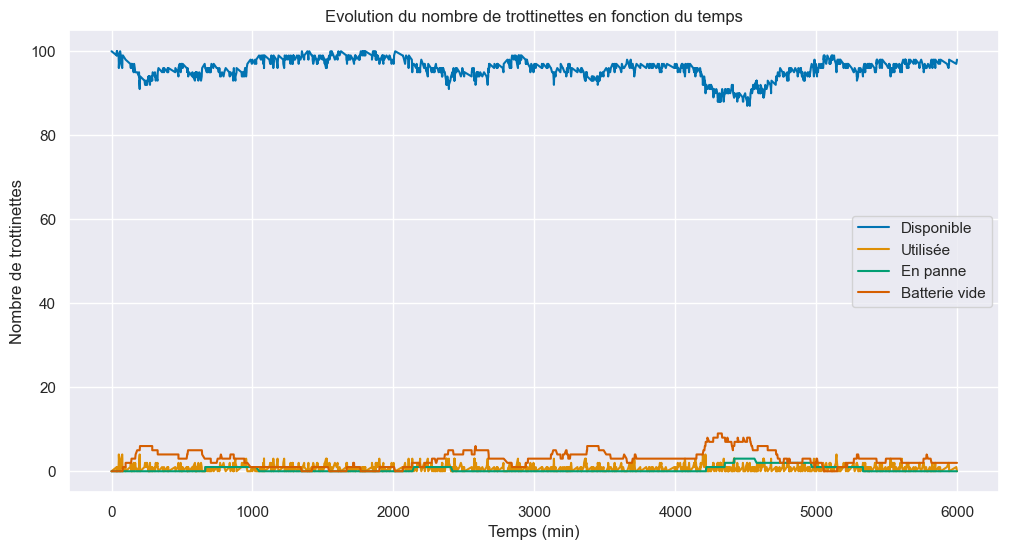

In [35]:
# Temps de simulation
simulationTime = 100*60

# Simulation du modèle
states, time = colonyModelSimulation(simulationTime)

# Affichage des résultats de la simulation
plt.figure(figsize=(12, 6))
plt.plot(time, states[:,0], label='Disponible')
plt.plot(time, states[:,1], label='Utilisée')
plt.plot(time, states[:,2], label='En panne')
plt.plot(time, states[:,3], label='Batterie vide')
plt.xlabel('Temps (min)')
plt.ylabel('Nombre de trottinettes')
plt.title('Evolution du nombre de trottinettes en fonction du temps')
plt.legend()
plt.show()

## **Question 5** 

#### **Approche 1:**

Pour approcher la probabilité stationnaire de la simulation, il faut compter le nombre de fois le système passe par chaque état possible. Donc d'abord il faut déterminer tous les états possibles du système, et enregistrer le nombre de fois que le système est passé par chaqur état. Ensuite, pour obtenir les probabilité stationnaires empiriques, on divise chaque comptage par le nombre total d'états pendant la simulation.

Puisqu'on se limite au cas $N=2$, il est évident qu'il existe 10 états possibles par lesquels le système peut passer :

In [36]:
possible_states = np.array([[2, 0, 0, 0],
                            [0, 2, 0, 0],
                            [0, 0, 2, 0],
                            [0, 0, 0, 2],
                            [1, 1, 0, 0],
                            [0, 1, 1, 0],
                            [0, 0, 1, 1],
                            [1, 0, 1, 0],
                            [0, 1, 0, 1],
                            [1, 0, 0, 1]])

In [37]:
def empiricalProbabilities(states, possible_states):
    """
    Calculer les probabilités empiriques de chaque état possible.

    Args:
        states (np.array): États du système à chaque instant après simulataion.
        possible_states (np.array): États possibles du système.

    Returns:
        empirical_probabilities (np.array): Probabilités empiriques de chaque état possible.
    """
    empirical_probabilities = []
    for state in possible_states:
        count = 0
        for s in states:
            if np.array_equal(s, state):
                count += 1
        empirical_probabilities.append(count)
    return np.array(empirical_probabilities)/len(states)

In [38]:
# Simulation pour N = 2
simulationTime = 10000*60 # 10000 minutes
states, time = colonyModelSimulation(simulationTime, N=2)
empirical_probabilities = empiricalProbabilities(states, possible_states)
print('Probabilités empiriques pour N = 2:', empirical_probabilities)

Probabilités empiriques pour N = 2: [0.09489066 0.04666584 0.0007691  0.0255259  0.14166043 0.08052715
 0.01116238 0.08092209 0.25683878 0.26103767]


Calculons les probabilités stationnaires théoriques :

In [39]:
def stationaryProbabilities(states):
    """
    Calculer les probabilité stationnaires théoriques des états d'un système.

    Args:
        states (np.array): États possibles du système.

    Returns:
        probas (np.array): Probabilités stationnaires.
    """
    probas = []
    for state in states :
        prob = np.prod([alphas[i]**state[i] for i in range(4)]) / np.prod([math.factorial(state[i]) for i in range(1,4)])
        probas.append(prob)
    probas = np.array(probas)
    return probas / np.sum(probas, axis=0)

In [40]:
# Calcul des probabilités stationnaires théoriques
stationary_probabilities = stationaryProbabilities(possible_states)
print('Probabilités stationnaires théoriques:', stationary_probabilities)

Probabilités stationnaires théoriques: [0.07842368 0.00980296 0.02205666 0.28585433 0.03921184 0.02940888
 0.15880796 0.05881776 0.10587197 0.21174395]


Validation de la simulation : Calculons les intervalles de confiance.

In [41]:
beta = 1.96 # alpha = 0.95

# Calcul des intervalles de confiance
X = [empiricalProbabilities([states[j]], possible_states) for j in range(len(states))]
sum_differences_squared = np.sum((X - empirical_probabilities)**2, axis=0)
sigma = np.sqrt( sum_differences_squared / (len(states) - 1))

inf = empirical_probabilities - sigma*beta/np.sqrt(len(states))
sup = empirical_probabilities + sigma*beta/np.sqrt(len(states))

for i, value in enumerate(stationary_probabilities):
    print(f"État {i+1}: Probabilité Stationnaire Théorique = {value:.4f} | Intervalle de Confiance = [{inf[i]:.4f}, {sup[i]:.4f}]")

État 1: Probabilité Stationnaire Théorique = 0.0784 | Intervalle de Confiance = [0.0923, 0.0975]
État 2: Probabilité Stationnaire Théorique = 0.0098 | Intervalle de Confiance = [0.0448, 0.0486]
État 3: Probabilité Stationnaire Théorique = 0.0221 | Intervalle de Confiance = [0.0005, 0.0010]
État 4: Probabilité Stationnaire Théorique = 0.2859 | Intervalle de Confiance = [0.0241, 0.0269]
État 5: Probabilité Stationnaire Théorique = 0.0392 | Intervalle de Confiance = [0.1385, 0.1448]
État 6: Probabilité Stationnaire Théorique = 0.0294 | Intervalle de Confiance = [0.0781, 0.0830]
État 7: Probabilité Stationnaire Théorique = 0.1588 | Intervalle de Confiance = [0.0102, 0.0121]
État 8: Probabilité Stationnaire Théorique = 0.0588 | Intervalle de Confiance = [0.0785, 0.0834]
État 9: Probabilité Stationnaire Théorique = 0.1059 | Intervalle de Confiance = [0.2529, 0.2607]
État 10: Probabilité Stationnaire Théorique = 0.2117 | Intervalle de Confiance = [0.2571, 0.2650]


#### **Approche 2:**

Par érgodicité, pour approcher la probabilité stationnaire de la simulation, on peut aussi compter la temps que le système fait dans chaque état possible, puis diviser ces temps par le temps totale de la simulation.

On modifie la fonction colonyModelSimulation pour enregistrer non seulement les états mais aussi le temps passé dans chaque état. Cela nous permettra de calculer la proportion du temps total de simulation pendant lequel le système se trouve dans chaque état.

In [42]:
def colonyModelSimulation2(simulationTime, N=2):
    """
    Simuler le modèle de colonie pour les trottinettes.

    Args:
        simulationTime (int): Temps total de simulation.
        N (int): Nombre total de trottinettes.

    Returns:
        states (list): États du système à chaque transition.
        state_times (list): Temps auxquels chaque transition d'état a lieu.
        time_spent_in_states (np.array): Temps total passé dans chaque état.
    """
    # Initialisation de l'état du système
    current_state = np.array([N, 0, 0, 0])
    states = [current_state.copy()]
    time = 0
    time_array = [time]
    state_time_spent = np.zeros((10,))  # Puisqu'il y a 10 états possibles

    # Simulation
    while time < simulationTime:
        transition_matrix = transitionMatrix(current_state)
        t = np.random.exponential(1/np.sum(transition_matrix))
        next_time = time + t
        if next_time > simulationTime:
            t = simulationTime - time  # Adjust the last time slice
        state_index = np.where((possible_states == current_state).all(axis=1))[0][0]
        state_time_spent[state_index] += t
        time += t
        time_array.append(int(time))
        current_state = nextState(current_state, transition_matrix)
        states.append(current_state.copy())

    return states, time_array, state_time_spent / simulationTime

simulationTime = 10000 * 60  # 10000 minutes
states, times, state_probabilities = colonyModelSimulation2(simulationTime, N=2)
print('Probabilités stationnaires estimées:', state_probabilities)

Probabilités stationnaires estimées: [0.07929405 0.01021986 0.02704906 0.29395531 0.04027573 0.02565658
 0.15839163 0.05574679 0.10311203 0.20629896]


## **Question 6** 

Si on considérait qu’il y a un nombre fini de prestataires $n_p$ et un nombre fini de techniciens $n_t$, alors le taux de transition $q(n,T_{3,1})$ de l'état "En panne" vers l'état "Disponible", ainsi que le taux de transition $q(n,T_{4,1})$ de l'état "Betterie vide" vers l'état "Disponible" devront changer.

$\Phi_3(n_3)$ continuerait à être égale à $n_3$ tant que le nombre de trottinettes en panne $n_3$ est inférieur au nombre de techniciens, sinon elle serait égale à $n_t$ :
$$\Phi_3(n_3) = n_3 \mathbf{1}(n_3\leq n_t) + n_t \mathbf{1}(n_3 > n_t) $$

Même raisonnement pour $\Phi_4(n_4)$, continuerait à être égale à $n_4$ tant que le nombre de trottinettes à batterie vide $n_4$ est inférieur au nombre de prestataires, sinon elle serait égale à $n_p$
$$\Phi_4(n_4) = n_4 \mathbf{1}(n_4\leq n_p) + n_p \mathbf{1}(n_4 > n_p) $$

## **Question 7** 

Si on considérait qu’une trottinette pouvait devenir irréparable avec une probabilité $p_i$, alors le taux de transition $q(n,T_{3,1})$ de l'état "En panne" vers l'état "Disponible" devrait changer. La trottinette doit être réparable pour pouvoir passer vers l'état "Disponible" est cela est possible avec une probabilité $1 - p_i$ et peut se faire dans un temps $t_intervention + t_réparation$, donc le changement à faire est :
$$ \lambda_{3,1} = (1 - p_i) \frac 1 {t_{intervention}+t_{recharge}}$$